<a href="https://colab.research.google.com/github/prabhkaur301/ML-notebooks/blob/main/Copy_of_Social_Media_Content.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sns: filename=sns-0.1-py3-none-any.whl size=2662 sha256=a02c6cac8e4412daa88db7bfc0549c8ba7194ddeaf03b41ef1978f679148168b
  Stored in directory: /root/.cache/pip/wheels/cc/26/02/785cf1aeaa8d9e565796a1b962467bcdf62172c8fe12096ffb
Successfully built sns


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns 
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [4]:
tds = pd.read_csv("/content/drive/MyDrive/Major project/True.csv")
fds = pd.read_csv("/content/drive/MyDrive/Major project/Fake.csv")

In [5]:
tds

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [6]:
class_true = ["Real"]*21417
tds["class_label"] = class_true
tds

,title,text,subject,date,class_label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",Real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",Real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",Real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",Real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",Real
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",Real
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",Real
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",Real
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",Real


In [7]:
fds

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [8]:
class_fake = ["Fake"]*23481
fds["class_label"] = class_fake
fds

,title,text,subject,date,class_label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",Fake
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",Fake
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",Fake
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",Fake


In [9]:
# Preprocessing
tweets_dataset = pd.concat([tds,fds], axis=0)
index = [i for i in range(len(tweets_dataset))]
tweets_dataset["index"] = index
tweets_dataset.set_index('index',inplace=True)

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

tweets_dataset['text'] = tweets_dataset['text'].apply(punctuation_removal)

tweets_dataset


,title,text,subject,date,class_label
index,,,,,
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON Reuters The head of a conservative...,politicsNews,"December 31, 2017",Real
1,U.S. military to accept transgender recruits o...,WASHINGTON Reuters Transgender people will be...,politicsNews,"December 29, 2017",Real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON Reuters The special counsel invest...,politicsNews,"December 31, 2017",Real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON Reuters Trump campaign adviser Geo...,politicsNews,"December 30, 2017",Real
4,Trump wants Postal Service to charge 'much mor...,SEATTLEWASHINGTON Reuters President Donald Tr...,politicsNews,"December 29, 2017",Real
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",Fake
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme W...,Middle-east,"January 16, 2016",Fake
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",Fake


In [10]:
# converting to all lowercase
tweets_dataset['text'] = tweets_dataset['text'].apply(lambda x: x.lower())
tweets_dataset.head()

,title,text,subject,date,class_label
index,,,,,
0,"As U.S. budget fight looms, Republicans flip t...",washington reuters the head of a conservative...,politicsNews,"December 31, 2017",Real
1,U.S. military to accept transgender recruits o...,washington reuters transgender people will be...,politicsNews,"December 29, 2017",Real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,washington reuters the special counsel invest...,politicsNews,"December 31, 2017",Real
3,FBI Russia probe helped by Australian diplomat...,washington reuters trump campaign adviser geo...,politicsNews,"December 30, 2017",Real
4,Trump wants Postal Service to charge 'much mor...,seattlewashington reuters president donald tr...,politicsNews,"December 29, 2017",Real


In [11]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

tweets_dataset['text'] = tweets_dataset['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
#shuffled dataset
tweets_dataset = tweets_dataset.sample(frac=1)
tweets_dataset

,title,text,subject,date,class_label
index,,,,,
30981,HOUSE OF LIES: Pedophilia Allegations Levied A...,gay community feel trumphating actor bill clin...,politics,"Oct 30, 2017",Fake
9314,Trump presidency? Bank of America CEO Moynihan...,reuters bank america corp chairman chief execu...,politicsNews,"June 2, 2016",Real
42369,ALL HELL IS ABOUT TO BREAK LOOSE Between Europ...,european nations naively opened borders millio...,left-news,"Feb 25, 2016",Fake
6208,U.S. Treasury nominee says would enforce all R...,washington reuters us treasury enforce sanctio...,politicsNews,"January 19, 2017",Real
21014,Persecution of all Muslims in Myanmar on the r...,bangkok reuters systematic persecution minorit...,worldnews,"September 5, 2017",Real
...,...,...,...,...,...
42810,Unreal! Senior Veteran Randomly Attacked Repea...,another example thug randomly attacking someon...,left-news,"Oct 25, 2015",Fake
44521,CIA Claims of Russian Intervention in US Elect...,21st century wire says seriously take secret c...,Middle-east,"December 14, 2016",Fake
40591,WOW! NEW YORK TIMES ADMITS They “Cooked The Nu...,2013 dr kermit gosnell convicted killing four ...,left-news,"Feb 8, 2017",Fake


In [13]:
tweets_dataset.class_label.value_counts()

Fake    23481
Real    21417
Name: class_label, dtype: int64

In [14]:
tweets_dataset["class_label_num"] = tweets_dataset["class_label"].map({"Fake":0,"Real":1})
tweets_dataset

,title,text,subject,date,class_label,class_label_num
index,,,,,,
30981,HOUSE OF LIES: Pedophilia Allegations Levied A...,gay community feel trumphating actor bill clin...,politics,"Oct 30, 2017",Fake,0
9314,Trump presidency? Bank of America CEO Moynihan...,reuters bank america corp chairman chief execu...,politicsNews,"June 2, 2016",Real,1
42369,ALL HELL IS ABOUT TO BREAK LOOSE Between Europ...,european nations naively opened borders millio...,left-news,"Feb 25, 2016",Fake,0
6208,U.S. Treasury nominee says would enforce all R...,washington reuters us treasury enforce sanctio...,politicsNews,"January 19, 2017",Real,1
21014,Persecution of all Muslims in Myanmar on the r...,bangkok reuters systematic persecution minorit...,worldnews,"September 5, 2017",Real,1
...,...,...,...,...,...,...
42810,Unreal! Senior Veteran Randomly Attacked Repea...,another example thug randomly attacking someon...,left-news,"Oct 25, 2015",Fake,0
44521,CIA Claims of Russian Intervention in US Elect...,21st century wire says seriously take secret c...,Middle-east,"December 14, 2016",Fake,0
40591,WOW! NEW YORK TIMES ADMITS They “Cooked The Nu...,2013 dr kermit gosnell convicted killing four ...,left-news,"Feb 8, 2017",Fake,0


## Exploration & Data Analysis

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


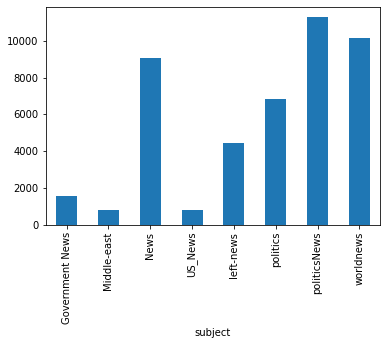

In [15]:
# How many articles per subject?
print(tweets_dataset.groupby(['subject'])['text'].count())
tweets_dataset.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

class_label
Fake    23481
Real    21417
Name: text, dtype: int64


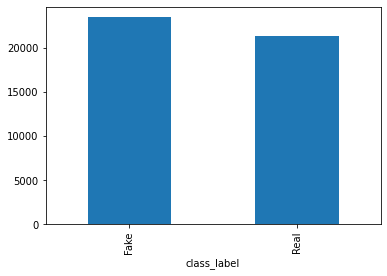

In [16]:
# How many fake and real articles?
print(tweets_dataset.groupby(['class_label'])['text'].count())
tweets_dataset.groupby(['class_label'])['text'].count().plot(kind="bar")
plt.show()

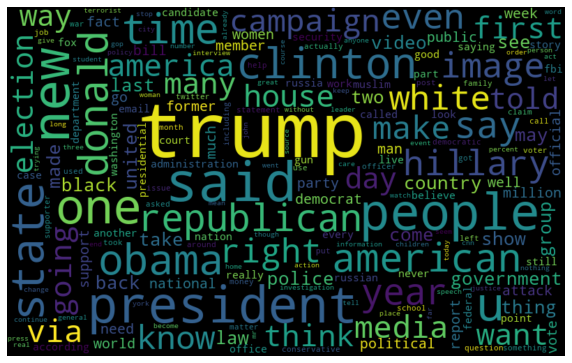

In [17]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = tweets_dataset[tweets_dataset["class_label"] == "Fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

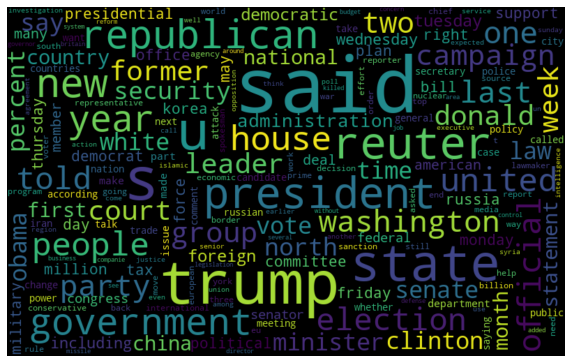

In [18]:
# Word cloud for real news
from wordcloud import WordCloud

fake_data = tweets_dataset[tweets_dataset["class_label"] == "Real"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

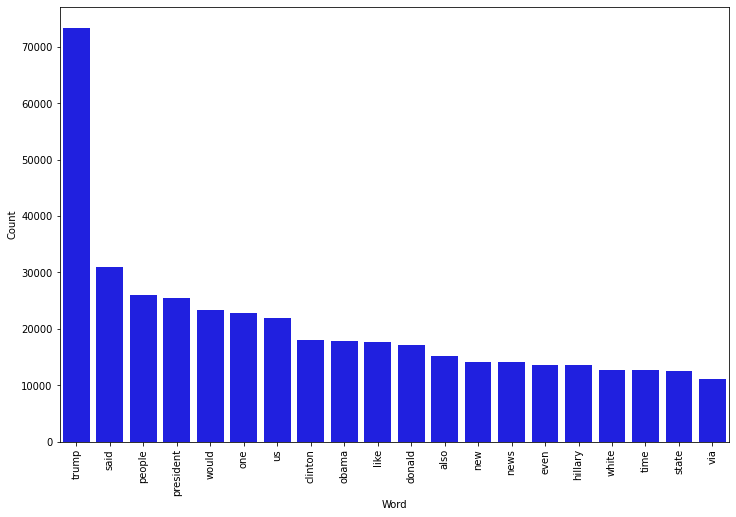

In [20]:
# Most frequent words in fake news
counter(tweets_dataset[tweets_dataset["class_label"] == "Fake"], "text", 20)

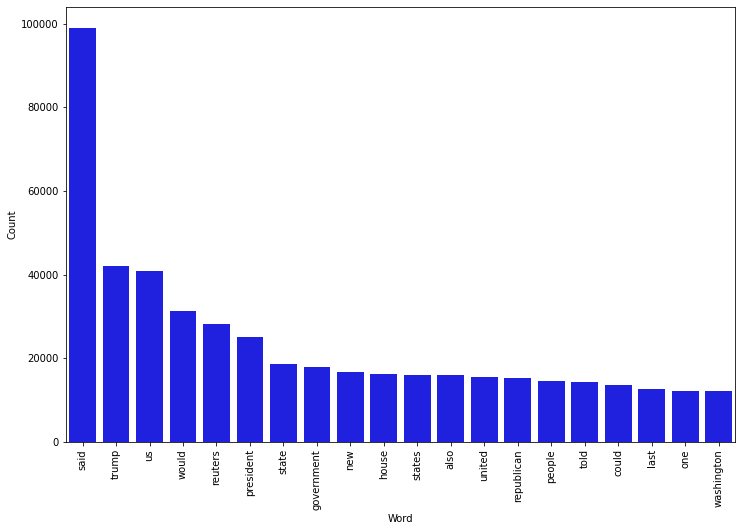

In [21]:
# Most frequent words in real news
counter(tweets_dataset[tweets_dataset["class_label"] == "Real"], "text", 20)

In [22]:
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import spacy
spacy.cli.download("en_core_web_lg")
nlp = spacy.load("en_core_web_lg", disable=['ner', 'parser'])

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [24]:
#nlp("Rohit Sharma's Team India will face Jos Buttler-led England in the second semifinal of the ICC men’s T20 World Cup 2022 at the Adelaide Oval on Thursday (November 10).\n Fans are hoping for a India vs Pakistan final, with Babar Azam's side already in the final after win over New Zealand on Wednesday (November 9). \nRohit Sharma’s side topped Super 12 Group 2 table with four wins in five games, their only loss coming against South Africa at Perth.\n\nEngland, on the other hand, finished second in Super 12 Group 1, losing to Ireland and their game against Australia was washed out without a ball being bowled.").vector

In [25]:
tweets_dataset["text_vec"]=tweets_dataset["text"].apply(lambda text: nlp(text).vector)
tweets_dataset

,title,text,subject,date,class_label,class_label_num,text_vec
index,,,,,,,
30981,HOUSE OF LIES: Pedophilia Allegations Levied A...,gay community feel trumphating actor bill clin...,politics,"Oct 30, 2017",Fake,0,"[-0.51293236, 0.14606902, -1.6903872, -0.76415..."
9314,Trump presidency? Bank of America CEO Moynihan...,reuters bank america corp chairman chief execu...,politicsNews,"June 2, 2016",Real,1,"[-0.48590672, 0.29701295, -1.6678187, 0.094021..."
42369,ALL HELL IS ABOUT TO BREAK LOOSE Between Europ...,european nations naively opened borders millio...,left-news,"Feb 25, 2016",Fake,0,"[-1.0593749, 0.7888075, -1.6813499, 0.6318438,..."
6208,U.S. Treasury nominee says would enforce all R...,washington reuters us treasury enforce sanctio...,politicsNews,"January 19, 2017",Real,1,"[-0.40044487, 0.8710345, -1.9426148, 0.1980646..."
21014,Persecution of all Muslims in Myanmar on the r...,bangkok reuters systematic persecution minorit...,worldnews,"September 5, 2017",Real,1,"[-1.1316481, -0.35555428, -1.2501241, 1.068524..."
...,...,...,...,...,...,...,...
42810,Unreal! Senior Veteran Randomly Attacked Repea...,another example thug randomly attacking someon...,left-news,"Oct 25, 2015",Fake,0,"[-1.071037, -0.037490465, -1.3205446, 0.386397..."
44521,CIA Claims of Russian Intervention in US Elect...,21st century wire says seriously take secret c...,Middle-east,"December 14, 2016",Fake,0,"[-0.37495887, -0.21733522, -0.6790828, 0.64542..."
40591,WOW! NEW YORK TIMES ADMITS They “Cooked The Nu...,2013 dr kermit gosnell convicted killing four ...,left-news,"Feb 8, 2017",Fake,0,"[-0.60784, -0.16513532, -1.3231368, -0.0619111..."


In [26]:
tweets_dataset["text_vec"]

index
30981    [-0.51293236, 0.14606902, -1.6903872, -0.76415...
9314     [-0.48590672, 0.29701295, -1.6678187, 0.094021...
42369    [-1.0593749, 0.7888075, -1.6813499, 0.6318438,...
6208     [-0.40044487, 0.8710345, -1.9426148, 0.1980646...
21014    [-1.1316481, -0.35555428, -1.2501241, 1.068524...
                               ...                        
42810    [-1.071037, -0.037490465, -1.3205446, 0.386397...
44521    [-0.37495887, -0.21733522, -0.6790828, 0.64542...
40591    [-0.60784, -0.16513532, -1.3231368, -0.0619111...
4616     [-0.1703426, 1.7017392, -2.5059407, -0.4350583...
36018    [-0.44461587, 0.3915361, -1.484171, -0.2401366...
Name: text_vec, Length: 44898, dtype: object

In [28]:
tweet_train, tweet_test, label_train, label_test = train_test_split(tweets_dataset.text_vec.values, tweets_dataset.class_label_num, test_size=0.2, random_state=2022)

In [29]:
tweet_train_2D = np.stack(tweet_train)
tweet_test_2D = np.stack(tweet_test)


In [30]:
"""
https://www.researchgate.net/post/what_are_the_different_algorithms_for_text_classification

Some Traditional ML Algorithms:
Logisitic Regression, Multinomial Naive Bayes, k Nearest Neighbors, Decision Tree and Support Vector Machine
Some Ensemble ML Algorithms are:
Adaboost, Random Forest, Bagging, Gradient Boosting etc
deep learning ones: 
Convolutional Neural Network (CNN), Long Short Term Modelr (LSTM), Recurrent Convolutional Neural Network (RCNN), etc
"""

'\nhttps://www.researchgate.net/post/what_are_the_different_algorithms_for_text_classification\n\nSome Traditional ML Algorithms:\nLogisitic Regression, Multinomial Naive Bayes, k Nearest Neighbors, Decision Tree and Support Vector Machine\nSome Ensemble ML Algorithms are:\nAdaboost, Random Forest, Bagging, Gradient Boosting etc\ndeep learning ones: \nConvolutional Neural Network (CNN), Long Short Term Modelr (LSTM), Recurrent Convolutional Neural Network (RCNN), etc\n'

In [31]:
models= dict()

In [32]:
mnb = MultinomialNB()
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(tweet_train_2D) #Negative values in data passed to MultinomialNB (input X)
scaled_test = scaler.transform(tweet_test_2D)
mnb.fit(scaled_train, label_train) # scaled to get positive range of numbers for pos & neg data

MultinomialNB()

In [33]:
label_pred = mnb.predict(scaled_test)
print(classification_report(label_test, label_pred))
print("accuracy: {}%".format(round(accuracy_score(label_test, label_pred)*100,2)))
models['MultinomialNB()']=round(accuracy_score(label_test, label_pred)*100,2)

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      4666
           1       0.90      0.87      0.88      4314

    accuracy                           0.89      8980
   macro avg       0.89      0.89      0.89      8980
weighted avg       0.89      0.89      0.89      8980

accuracy: 89.05%


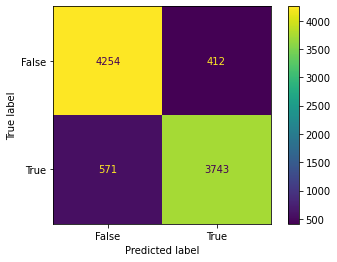

In [34]:
confusion_matrix_nb = confusion_matrix(label_test, label_pred)

cm_display= ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_nb, display_labels = [False, True])

cm_display.plot()
plt.show() 

In [35]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn.fit(tweet_train_2D, label_train)

KNeighborsClassifier(metric='euclidean')

In [36]:
label_pred_knn = knn.predict(tweet_test_2D)
print(classification_report(label_test, label_pred_knn))
print("accuracy: {}%".format(round(accuracy_score(label_test, label_pred_knn)*100,2)))
models['KNN']=round(accuracy_score(label_test, label_pred_knn)*100,2)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      4666
           1       0.98      0.96      0.97      4314

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980

accuracy: 97.08%


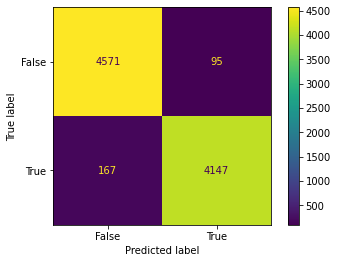

In [37]:
confusion_matrix_knn = confusion_matrix(label_test, label_pred_knn)
cm_display= ConfusionMatrixDisplay(confusion_matrix_knn ,display_labels = [False, True])
cm_display.plot()
plt.show() 

In [38]:
sv = svm.SVC()
sv.fit(tweet_train_2D, label_train)

SVC()

In [39]:
label_pred_sv = sv.predict(tweet_test_2D)
print(classification_report(label_test, label_pred_sv))
print("accuracy: {}%".format(round(accuracy_score(label_test, label_pred_sv)*100,2)))
models['SVM']=round(accuracy_score(label_test, label_pred_sv)*100,2)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4666
           1       0.98      0.98      0.98      4314

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980

accuracy: 98.31%


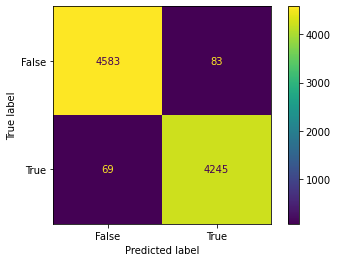

In [40]:
confusion_matrix_sv = confusion_matrix(label_test, label_pred_sv)

cm_display= ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_sv, display_labels = [False, True])

cm_display.plot()
plt.show() 

In [41]:
randfor = RandomForestClassifier(max_depth=14, random_state=2022) # at max_depth 14, acc is max, no inc after that
#The random_state in these algorithms controls two randomized processes — bootstrapping of the samples when creating tress and getting a random subset of features to search for the best feature during the node splitting process when creating each tree.
randfor.fit(tweet_train_2D, label_train)

RandomForestClassifier(max_depth=14, random_state=2022)

In [42]:
label_pred_randfor = randfor.predict(tweet_test_2D)
print(classification_report(label_test, label_pred_randfor))
print("accuracy: {}%".format(round(accuracy_score(label_test, label_pred_randfor)*100,2)))
models['Random Forest']=round(accuracy_score(label_test, label_pred_randfor)*100,2)


              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4666
           1       0.98      0.97      0.97      4314

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980

accuracy: 97.54%


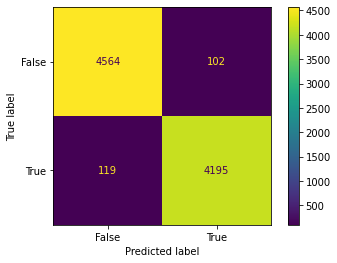

In [43]:
confusion_matrix_rd = confusion_matrix(label_test, label_pred_randfor)
cm_display= ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rd, display_labels = [False, True])
cm_display.plot()
plt.show() 

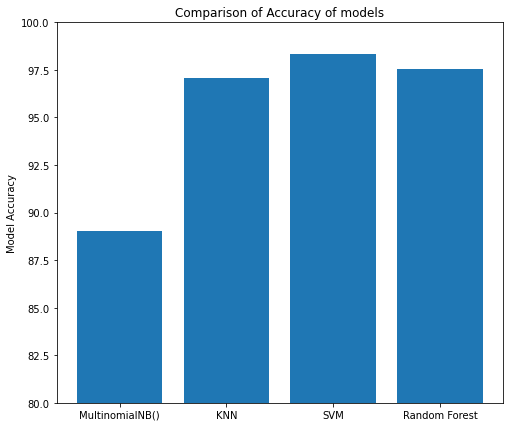

In [45]:
plt.figure(figsize=(8,7))
plt.bar(list(models.keys()),list(models.values()))
plt.ylim(80,100)
plt.ylabel('Model Accuracy')
plt.title('Comparison of Accuracy of models')
plt.show()



# Predictive System

In [65]:
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

def news_detect(news):
  input_data=punctuation_removal(news)
  vectorised_input_data=nlp(input_data).vector
  data_2D= vectorised_input_data.reshape(1, -1)
  prediction=randfor.predict(data_2D)
  if(prediction==0):
    print("Entered News is Fake!")
  else:
    print("News is Real")


In [58]:
news_detect('(Reuters) - Richard Cordray, a Democrat whose resignation as head of the U.S. consumer bureau last month triggered a political battle over who should replace him, plans to run for governor of Ohio, an advisor said on Monday. Cordray will make the announcement at an event on Tuesday at a restaurant in his home town of Grove City, Ohio, said the advisor, who asked to remain anonymous. Cordray will later tour Ohio, meeting with Democratic activists, community leaders and voters, the advisor said. When he resigned last month, Cordray named his deputy to head the Consumer Financial Protection Bureau. But the appointment was mired in turmoil after President Donald Trump assigned White House budget chief Mick Mulvaney to the role. A federal judge last week sided with Trump, but the deputy, Leandra English, is challenging the decision. The 2018 election is to replace Ohio Governor John Kasich, a Republican who cannot seek a third term because of term limits in the pivotal election battleground state. Kasich ran unsuccessfully for president in 2016. Many Democrats have said Cordray, with his reputation for being tough on banks and defending consumers, is their best hope for taking the Ohio governor’s mansion and chipping away at Republicans’ dominance in state government. Several candidates from both the Republican and Democratic parties announced they would run for Ohio governor, according to local media. Cordray delivered a campaign-style speech at a Labor Day celebration in Cincinnnati in September, but at the time he stopped short of saying whether he intended to run for governor. The Ohio native was the first director of the Consumer Financial Protection Bureau, a consumer watchdog agency created under former President Barack Obama in the aftermath of the 2007-2009 financial crisis.  In Washington, Mulvaney on Monday said he has no intention of firing English. ')

News is Real


In [61]:
news_detect("The Odisha pavilion do not won the prestigious 'Special Appreciation Certificate for excellence in display' in the category of 'State Government and Union Territory' on Sunday at the 41st edition of India International Trade Fair(IITF), 2022. held at Pragati Maidan, New Delhi.")

News is Real


In [60]:
news_detect("Last year a mysterious shipment was caught smuggling Coronavirus from Canada. It was traced to Chinese agents working at a Canadian lab. Subsequent investigation by GreatGameIndia linked the agents to Chinese Biological Warfare Program from where the virus is suspected to have leaked causing the Wuhan Coronavirus outbreak.")

News is Real


In [63]:
news_detect("Israeli Defense Minister: If Pakistan sends ground troops into Syria on any pretext, we will destroy this country with a nuclear attack")

Entered News is Fake!


In [64]:
news_detect("Leonardo DiCaprio donates $10 million to his grandmother's homeland Ukraine")

News is Real


In [66]:
news_detect("No Reprieve For Consumers As Congress Gives Themselves A Raise & Inflation Expected To Continue Soaring")

News is Real
